In [3]:
import cv2
print(cv2.__version__)

4.10.0


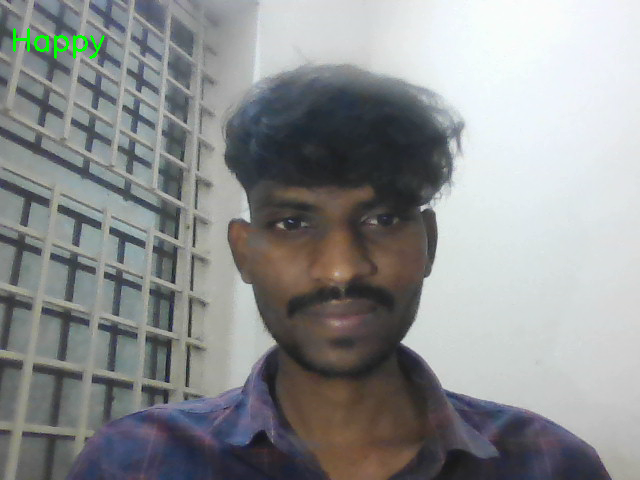

Video stream stopped.


In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps
from IPython.display import display, clear_output

# Load ResNet50 model (Ensure it's trained for emotion classification)
model = tf.keras.models.load_model("emotion20E_model.h5")

# Define emotion labels (Ensure it matches your training labels)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Initialize webcam
cap = cv2.VideoCapture(0)

try:
    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert frame to RGB (ResNet50 expects RGB images)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Resize to ResNet50 input size (e.g., 224x224)
        resized_frame = cv2.resize(frame_rgb, (224, 224))
        
        # Convert to array and preprocess
        img_array = image.img_to_array(resized_frame)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)  # Normalize as per ResNet50
        
        # Predict emotion
        predictions = model.predict(img_array, verbose=0)
        emotion_index = np.argmax(predictions)
        emotion = emotion_labels[emotion_index]
        
        # Display emotion on the frame
        cv2.putText(frame, emotion, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        # Convert the frame to RGB format for display in Jupyter
        frame_rgb_display = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(frame_rgb_display)
        
        # Display the frame in the notebook
        clear_output(wait=True)
        display(pil_img)

except KeyboardInterrupt:
    print("Video stream stopped.")

finally:
    cap.release()

